# Projection Matrix Coding Challenge

Recall, again, that an $n\times m$ matrix is exactly $n$ samples of $m$ dimensional data. When $m$ is 1, 2, or 3, we can draw a picture of it. $m > 3$ suffers from the curse of dimensionality and also cannot be visualized without some careful manipulations.

$x = \begin{pmatrix} 0 & 1 & 4 & 1 \\ 1 & 2 & 2 & 1 \\ 4 & 4 & 0 & 1 \end{pmatrix}$

The above $3 \times 4$ matrix can't be directly visualized. Each of the three points has four dimensions! Returning to linear algebra, a $l \times m$ matrix times a $m \times n$ matrix produces a $l \times n$ matrix. 

$\left( l \times m\right) \times \left(m \times n\right) = \left(l \times n\right)$

This kind of matrix multiplication is called a "Projection", projecting each of the $m$ dimensional points onto an $l$ dimensional vector.

$M = \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0.5 \\ 0.5 & 0 \end{pmatrix}$

$xM = \begin{pmatrix} 0 & 1 & 4 & 1 \\ 1 & 2 & 2 & 1 \\ 4 & 4 & 0 & 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0.5 \\ 0.5 & 0 \end{pmatrix} = \begin{pmatrix} 0.5 & 1 + 2 \\ 1 + 0.5 & 2 + 1 \\ 4 + 0.5 & 4 \end{pmatrix} = \begin{pmatrix} 0.5 & 3 \\ 1.5 & 3 \\ 4.5 & 4 \end{pmatrix}$

$x$ is now a $3 x 2$ matrix.

Below, three sets of points are plotted in a 3d scatter plot.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


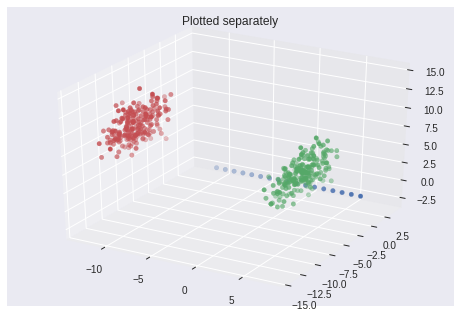

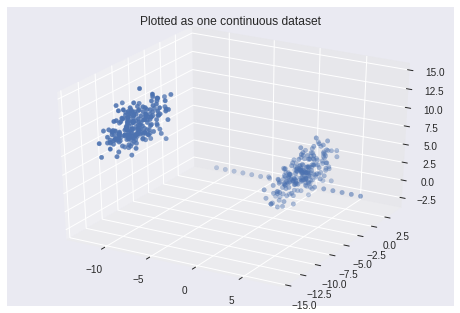

In [1]:
# Dimensional Projection Coding Challenge

# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(-8,8,17)
Z = np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0).T * x

points1 = np.random.multivariate_normal([1,1,1],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)
points2 = np.random.multivariate_normal([-10,-10,10],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)

zx, zy, zz = Z
p1x, p1y, p1z = points1.T
p2x, p2y, p2z = points2.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zx,zy,zz)
ax.scatter(p1x,p1y,p1z)
ax.scatter(p2x,p2y,p2z)
ax.set_title('Plotted separately')

all_points = np.concatenate([Z.T,points1,points2],axis=0)
xa, ya, za = all_points.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xa, ya, za)
ax.set_title('Plotted as one continuous dataset');

# Multiply by a matrix and plot in 2d

Create a 2d matrix `projection_matrix`, multiply it with the points above, and chart the result.

1. Remember that numpy will perform matrix multiplication for you. You don't need to write those routines.
2. Remember that the orientation $m \times n$ of your matrices is important and requires constant attention.

After you've plotted the points in $2d$, try modifying your projection matrix to get more interesting results. The 3d points above can be projected onto any $2d$ plane, which will greatly affect their appearance and separability.

* Remember that any $2 \times 2$ matrix $M$ can be a composition of other matrices: $M = TRS$
* Try applying rotation, translation, and scale to your projection matrix to change the appearance of your new $2d$ plot.

In [2]:
# Your work goes here|

print(all_points.shape)

(417, 3)


The data consists of 417 3-dimensional vectors. In order to project onto a 2D plane, we can multiply the data by a 3-by-2 matrix.

More formally, we can construct a 3-by-3 square matrix with zeros in its right-most column. If the upper-right corner of this projection matrix resembles the 2-by-2 identity matrix, then this would be an [orthographic projection](https://en.wikipedia.org/wiki/Orthographic_projection), sometimes also called an orthogonal projection. Otherwise, it will be an [Oblique projection](https://en.wikipedia.org/wiki/Oblique_projection). Note that other types of projections exist, and would have different forms of projection matrices.

After applying the projection to the data, we can then visualize the plane that all the data is projected onto by plotting the first two dimensions. Of course, I will first check to see that the 3rd dimension is indeed a constant, zero, as expected.

In order to think more intuitively about the projection as a transformation being applied to the data, and so that I will be able to compose multiple transformations, I will transpose the data so that it can be on the right-hand side of a sequence of matrix multiplies.

In [3]:
points_T = all_points.T
print(all_points.shape)

projection = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])

points_R = np.matmul(projection, points_T)

print(points_R[2])

(417, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

As expected, the data has been projected onto the a plane with $z = 0$

In [0]:
x, y = points_R[0], points_R[1]

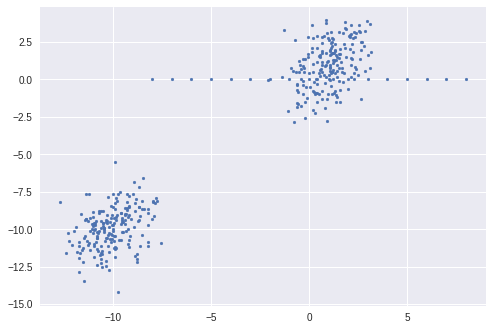

In [5]:
plt.scatter(x, y, s=8);

While the two Gaussians are well separated in this projection, the Gaussian that originally had mean $(1, 1, 1)$ is now superimposed on the 17 points between $(-8, 8)$ on the x-axis. Because this Gaussian has points on either side of all 3 axes, it cannot be cleanly separated from the x-axis in a projection.

We can apply 2D transformations to the data, such as rotating it so that the lower Gaussian appears in the 1st quadrant.

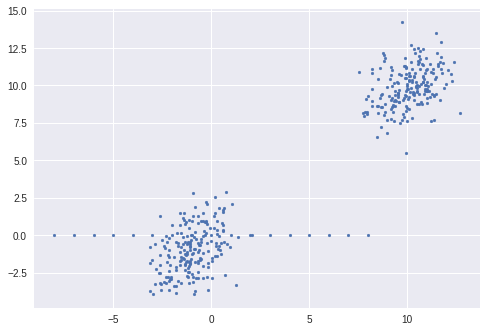

In [6]:
R = np.array([[-1, 0], [0, -1]])

points = points_R[:2]

x, y = np.matmul(R, points)

plt.scatter(x, y, s=8);